In [2]:
import torch 
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from metropolis import sample_metropolis_hasting
from model import EnergyModel
import torch.nn.functional as F

In [7]:
ds_USPS  = torchvision.datasets.USPS('USPS', train=True, download=True,
                                     transform=torchvision.transforms.Compose([
                                         torchvision.transforms.Resize(16),
                                         torchvision.transforms.ToTensor()]))

torch.Size([4, 1, 16, 16])
tensor([6, 5, 4, 7])


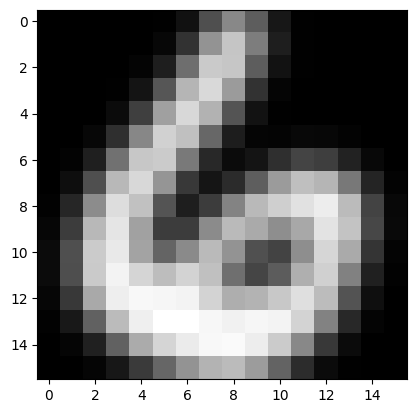

In [9]:
data_loader = torch.utils.data.DataLoader(ds_USPS, batch_size = 4)
for (X,y) in data_loader:
    print(X.shape)
    plt.imshow(X[0][0].cpu().numpy(), cmap='gray')
    print(y)
    break

In [4]:
model = EnergyModel()
model.load_state_dict(torch.load("./model_saves/Model_Checkpoint_20.pt"))

<All keys matched successfully>

In [5]:
model.eval()

EnergyModel(
  (nets): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

In [10]:
x_0 = torch.randn_like(torch.Tensor(1,1,28,28))

torch.Size([1, 1, 28, 28])


In [39]:
x_0 = torch.randn_like(torch.Tensor(1,1,28,28))
output_sample= sample_metropolis_hasting(x_0,100,model,"cpu")
output = model(output_sample)
probs = F.softmax(out[:, :, i, j], dim=-1).data
sample[:, :, i, j] = torch.multinomial(probs, 1).float() / 255.0

torch.Size([1, 256, 28, 28])


In [23]:
torchvision.utils.save_image(output[0][0], "sample.png")